Maestria en "Analítica de datos"
---
Nombre: Nataly Paola Villamil Perez
Codigo:
Fecha: 2025 agosto 28
---
Descripción:  Ejercicios de procesamiento paralelo

# 1.Librerias

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Carga/obtención de información

In [3]:
url_forder_cSv="/content/drive/MyDrive/3° Semestre/Big_data/Dataset_tutelas"

In [4]:
listado_archivos=[f for f in os.listdir(url_forder_cSv) if f.endswith(".csv")]
print(listado_archivos)

['tutelas_con_providencias_2021.csv', 'tutelas_con_providencias_2023.csv', 'tutelas_con_providencias_2025.csv', 'tutelas_con_providencias_2024.csv', 'tutelas_con_providencias_2022.csv']


In [5]:
columnas_nombre=["clasificacion",
                 "num_expediente",
                 "fecha_radica",
                 "demandante",
                 "demandado",
                 "primera_instancia",
                 "segunda_instancia",
                 "num_23digitos",
                 "providencia",
                 "fechaSentencia"]

df_tutelas=pd.DataFrame(columns=columnas_nombre)
display(df_tutelas)

Empty DataFrame
Columns: [clasificacion, num_expediente, fecha_radica, demandante, demandado, primera_instancia, segunda_instancia, num_23digitos, providencia, fechaSentencia]
Index: []

## 2.a Procesamiento secuencial (uno tras otro)

In [6]:
df_list=[] #lista de df Resultante de los datos de cada uno de los csv cargados
for archivo_nombre in listado_archivos:
  ruta_archivo=os.path.join(url_forder_cSv,archivo_nombre) #ruta completa del archivo
  print(ruta_archivo)
  df_temporal=pd.read_csv(ruta_archivo,sep=";",encoding="latin-1",on_bad_lines="skip")
  df_temporal.columns=columnas_nombre #agregar los nombres de columnas
  if (len(df_temporal.columns)==len(columnas_nombre)):
    df_list.append(df_temporal)
  else:
    print(f"no trabajado {archivo_nombre} no tiene 10 columnas")

##Luego de cargar todos los CVS-> combinar

if df_list:
  df_tutelas= pd.concat(df_list,ignore_index=True)
 #reemplazar las palabras "NULL" por "NONE"
  df_tutelas.replace("NULL","NONE",inplace=True)
  display(df_tutelas.head())


/content/drive/MyDrive/3° Semestre/Big_data/Dataset_tutelas/tutelas_con_providencias_2021.csv
/content/drive/MyDrive/3° Semestre/Big_data/Dataset_tutelas/tutelas_con_providencias_2023.csv
/content/drive/MyDrive/3° Semestre/Big_data/Dataset_tutelas/tutelas_con_providencias_2025.csv


/tmp/ipython-input-2443300077.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temporal=pd.read_csv(ruta_archivo,sep=";",encoding="latin-1",on_bad_lines="skip")


/content/drive/MyDrive/3° Semestre/Big_data/Dataset_tutelas/tutelas_con_providencias_2024.csv
/content/drive/MyDrive/3° Semestre/Big_data/Dataset_tutelas/tutelas_con_providencias_2022.csv


clasificacion num_expediente         fecha_radica  \
0  Acciones de Tutela       T8531726  2021-12-16 00:00:00   
1  Acciones de Tutela       T8531728  2021-12-16 00:00:00   
2  Acciones de Tutela       T8531723  2021-12-16 00:00:00   
3  Acciones de Tutela       T8531727  2021-12-16 00:00:00   
4  Acciones de Tutela       T8531716  2021-12-16 00:00:00   

                                          demandante  \
0                             ESCORCIA JORGE ARMANDO   
1                       ARCINIEGAS MEDRANO CLEMENCIA   
2                        SERRANO ROJAS CAMILO ANDRES   
3                        GOMEZ QUINTERO EDILSA MARIA   
4  MARIN CARRILLO GLENYS LEONOR AO DE CAMELO VELA...   

                                           demandado  \
0                  ALCALDIA MUNICIPAL DE SANTA LUCIA   
1                                COLPENCIONES Y OTRO   
2                 SECRETARIA DE MOVILIDAD DE CAQUEZA   
3                                CAJACOPI EPS Y OTRO   
4  JUNTA REGIONAL DE CALIFICACION DE INVALIDEZ DE...   

                                   primera_instancia  \
0  SANTA LUCIA,ATLANTICO, JUZGADO 1 PROMISCUO MUN...   
1  BARRANQUILLA,ATLANTICO, JUZGADO 11 LABORAL DEL...   
2  CAQUEZA,CUNDINAMARCA, JUZGADO 1 PROMISCUO MUNI...   
3        CURUMANI,CESAR, JUZGADO PROMISCUO MUNICIPAL   
4  SANTA MARTA,MAGDALENA, JUZGADO 1 ADMINISTRATIV...   

                                   segunda_instancia num_23digitos  \
0  SABANALARGA,ATLANTICO, JUZGADO 2 PROMISCUO DEL...            --   
1  BARRANQUILLA,ATLANTICO, TRIBUNAL SUPERIOR SALA...            --   
2                                                 --            --   
3       CHIRIGUANA,CESAR, JUZGADO PENAL DEL CIRCUITO            --   
4                                                 --            --   

  providencia           fechaSentencia  
0          --                      NaN  
1    T-274/22  2022-07-28 00:00:00.000  
2          --                      NaN  
3          --                      NaN  
4          --                      NaN

# 2.b Procesamiento en paralelo (todos al tiempo)

In [7]:
from concurrent.futures import ThreadPoolExecutor, as_completed #usada para procesamiento en paralelo

In [8]:
def cargar_data_desde_archivo_csv(ruta_archivo):
  try:
     df_temporal=pd.read_csv(ruta_archivo,sep=";",encoding="latin-1",on_bad_lines="skip")
     df_temporal.columns=columnas_nombre #agregar los nombres de columnas
     if (len(df_temporal.columns)==len(columnas_nombre)):
      print(f"archivo {os.path.basename(ruta_archivo)} cargado correctamente")
      return df_temporal
     else:
      print(f"no trabajado {os.path.basename(ruta_archivo)} no tiene 10 columnas")
      return None

  except Exception as e:
    print(f"Error al procesar el archivo {ruta_archivo}: {str(e)}")
    return None

In [12]:
df_list=[] #list of df Resulting from the data of each of the loaded csv
with ThreadPoolExecutor() as executor:
  future_to_file={executor.submit(cargar_data_desde_archivo_csv,os.path.join(url_forder_cSv,archivo_nombre)):archivo_nombre for archivo_nombre in listado_archivos}
  for future in as_completed(future_to_file):
    df=future.result()
    if df is not None:
      df_list.append(df)

##Luego de cargar todos los CVS-> combinar
if df_list:
  df_tutelas= pd.concat(df_list,ignore_index=True)
 #reemplazar las palabras "NULL" por "NONE"
  df_tutelas.replace("NULL","NONE",inplace=True)
  display(df_tutelas.head(-5))

archivo tutelas_con_providencias_2021.csv cargado correctamente
archivo tutelas_con_providencias_2022.csv cargado correctamente


/tmp/ipython-input-1660653846.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temporal=pd.read_csv(ruta_archivo,sep=";",encoding="latin-1",on_bad_lines="skip")


archivo tutelas_con_providencias_2025.csv cargado correctamente
archivo tutelas_con_providencias_2023.csv cargado correctamente
archivo tutelas_con_providencias_2024.csv cargado correctamente


clasificacion num_expediente         fecha_radica  \
0        Acciones de Tutela       T8531726  2021-12-16 00:00:00   
1        Acciones de Tutela       T8531728  2021-12-16 00:00:00   
2        Acciones de Tutela       T8531723  2021-12-16 00:00:00   
3        Acciones de Tutela       T8531727  2021-12-16 00:00:00   
4        Acciones de Tutela       T8531716  2021-12-16 00:00:00   
...                     ...            ...                  ...   
3371208  Acciones de Tutela       T9909588  2024-01-11 00:00:00   
3371209  Acciones de Tutela       T9909585  2024-01-11 00:00:00   
3371210  Acciones de Tutela       T9909583  2024-01-11 00:00:00   
3371211  Acciones de Tutela       T9909582  2024-01-11 00:00:00   
3371212  Acciones de Tutela       T9909578  2024-01-11 00:00:00   

                                                demandante  \
0                                   ESCORCIA JORGE ARMANDO   
1                             ARCINIEGAS MEDRANO CLEMENCIA   
2                              SERRANO ROJAS CAMILO ANDRES   
3                              GOMEZ QUINTERO EDILSA MARIA   
4        MARIN CARRILLO GLENYS LEONOR AO DE CAMELO VELA...   
...                                                    ...   
3371208                   VALENCIA GRAJALES CARLOS EUGENIO   
3371209                       SALINAS SALINAS  LUIS EVELIO   
3371210                          ARBELAEZ LOPEZ LUZ MARINA   
3371211  TORO GUILLEN  KARLA YERALDINE EN REPRESENTACIO...   
3371212  CHAVEZ SANTACRUZ ANA SILVIA AO DE BOLAÃOS RAFAEL   

                                                 demandado  \
0                        ALCALDIA MUNICIPAL DE SANTA LUCIA   
1                                      COLPENCIONES Y OTRO   
2                       SECRETARIA DE MOVILIDAD DE CAQUEZA   
3                                      CAJACOPI EPS Y OTRO   
4        JUNTA REGIONAL DE CALIFICACION DE INVALIDEZ DE...   
...                                                    ...   
3371208                            SAVIA SALUD EPS Y OTROS   
3371209  ADMINISTRADORA COLOMBIANA DE PENSIONES - COLPE...   
3371210                                   AFP COLPENSIONES   
3371211  DEPARTAMENTO ADMINISTRATIVO PARA LA PROSPERIDA...   
3371212                                        SANITAS EPS   

                                         primera_instancia  \
0        SANTA LUCIA,ATLANTICO, JUZGADO 1 PROMISCUO MUN...   
1        BARRANQUILLA,ATLANTICO, JUZGADO 11 LABORAL DEL...   
2        CAQUEZA,CUNDINAMARCA, JUZGADO 1 PROMISCUO MUNI...   
3              CURUMANI,CESAR, JUZGADO PROMISCUO MUNICIPAL   
4        SANTA MARTA,MAGDALENA, JUZGADO 1 ADMINISTRATIV...   
...                                                    ...   
3371208  MEDELLIN,ANTIOQUIA, JUZGADO 11 PENAL MUNICIPAL...   
3371209  BOGOTA,CUNDINAMARCA, JUZGADO 44 ADMINISTRATIVO...   
3371210        CARTAGO,VALLE, JUZGADO 1 PENAL DEL CIRCUITO   
3371211  CUCUTA,NORTE DE SANTANDER, JUZGADO 1 PENAL DEL...   
3371212       BUESACO,NARIÃO, JUZGADO PROMISCUO MUNICIPAL   

                                         segunda_instancia  \
0        SABANALARGA,ATLANTICO, JUZGADO 2 PROMISCUO DEL...   
1        BARRANQUILLA,ATLANTICO, TRIBUNAL SUPERIOR SALA...   
2                                                       --   
3             CHIRIGUANA,CESAR, JUZGADO PENAL DEL CIRCUITO   
4                                                       --   
...                                                    ...   
3371208                                                 --   
3371209                                                 --   
3371210                                                 --   
3371211                                                 --   
3371212        PASTO,NARIÃO, JUZGADO 5 PENAL DEL CIRCUITO   

                   num_23digitos providencia           fechaSentencia  
0                             --          --                      NaN  
1                             --    T-274/22  2022-07-28 00:00:00.000  
2            

In [11]:
df_tutelas.describe()

clasificacion num_expediente         fecha_radica   demandante  \
count              3371218        3371218              3371218      3371218   
unique                   1        3371051                 1090      2423488   
top     Acciones de Tutela       T8188244  2024-11-15 00:00:00  PORVENIR SA   
freq               3371218              5                 4171         1240   

        demandado                                  primera_instancia  \
count     3371210                                            3371215   
unique     692732                                             115054   
top     NUEVA EPS  BOGOTA,CUNDINAMARCA, TRIBUNAL SUPERIOR DE BOGO...   
freq       134623                                               9903   

       segunda_instancia num_23digitos providencia           fechaSentencia  
count            2401957       3371218     3371211                     1720  
unique             45776       3355929        1564                      700  
top                   --            --          --  2023-12-15 00:00:00.000  
freq             1642701          9540     3369479                       15

### Regimen

In [13]:
url_forder_cSv_r="/content/drive/MyDrive/3° Semestre/Big_data/Poblacion_BD_unica_afiliados"

In [15]:
listado_archivos_r=[f for f in os.listdir(url_forder_cSv_r) if f.endswith(".csv")]
print(listado_archivos_r)

['Población_Base_de_Datos_Única_de_Afiliados_BDUA_del_régimen_subsidiado_20250828.csv', 'Población_Base_de_Datos_Única_de_Afiliados_BDUA_del_régimen_contributivo_20250828.csv']


In [16]:
columnas_nombre_r=[ 0   Genero                          1178878 non-null  object
 1   Grupo etario                    1178878 non-null  object
 2   Código de la entidad            1178878 non-null  object
 3   Nombre de la entidad            1178878 non-null  object
 4   Régimen al que pertenece        1178878 non-null  object
 5   Tipo de afiliado                1178878 non-null  object
 6   Estado del afiliado             1178878 non-null  object
 7   Condición del beneficiario      1178878 non-null  object
 8   Zona de Afiliación              1178878 non-null  object
 9   Departamento                    1178878 non-null  object
 10  Municipio                       1178878 non-null  object
 11  Nivel del Sisbén                1177109 non-null  object
 12  Grupo poblacional del afiliado  1161207 non-null  object
 13  cantidad

df_regimen=pd.DataFrame(columns=columnas_nombre_r)
display(df_regimen)

Empty DataFrame
Columns: [Genero, Grupo etario, Código de la entidad, Nombre de la entidad, Régimen al que pertenece, Tipo de afiliado, Estado del afiliado , Condición del beneficiario, Zona de Afiliación, Departamento, Municipio, Nivel del Sisbén, Grupo poblacional del afiliado, cantidad]
Index: []

In [20]:
df_list_r=[] #lista de df Resultante de los datos de cada uno de los csv cargados
for archivo_nombre_r in listado_archivos_r:
  ruta_archivo_r=os.path.join(url_forder_cSv_r,archivo_nombre_r) #ruta completa del archivo
  print(ruta_archivo_r)
  df_temporal_r=pd.read_csv(ruta_archivo_r,sep=",",encoding="latin-1",on_bad_lines="skip")
  df_temporal_r.columns=columnas_nombre_r #agregar los nombres de columnas
  if (len(df_temporal_r.columns)==len(columnas_nombre_r)):
    df_list_r.append(df_temporal_r)
  else:
    print(f"no trabajado {archivo_nombre_r} no tiene {len(columnas_nombre_r)} columnas")

##Luego de cargar todos los CVS-> combinar

if df_list_r:
  df_regimen= pd.concat(df_list_r,ignore_index=True)
 #reemplazar las palabras "NULL" por "NONE"
  df_regimen.replace("NULL","NONE",inplace=True)
  display(df_regimen.head())

/content/drive/MyDrive/3° Semestre/Big_data/Poblacion_BD_unica_afiliados/Población_Base_de_Datos_Única_de_Afiliados_BDUA_del_régimen_subsidiado_20250828.csv
/content/drive/MyDrive/3° Semestre/Big_data/Poblacion_BD_unica_afiliados/Población_Base_de_Datos_Única_de_Afiliados_BDUA_del_régimen_contributivo_20250828.csv


Genero Grupo etario Código de la entidad  \
0  Masculino      65 a 70               EPSS05   
1   Femenino         > 75               EPSS02   
2  Masculino      50 a 55               ESS062   
3   Femenino      60 a 65               EPS025   
4   Femenino      45 a 50               EPSS02   

                                Nombre de la entidad Régimen al que pertenece  \
0      ENTIDAD PROMOTORA DE SALUD SANITAS S.A.S. -CM               Subsidiado   
1  SALUD TOTAL ENTIDAD PROMOTORA DE SALUD DEL REG...               Subsidiado   
2                             ASMET SALUD EPS S.A.S.               Subsidiado   
3                                   CAPRESOCA E.P.S.               Subsidiado   
4  SALUD TOTAL ENTIDAD PROMOTORA DE SALUD DEL REG...               Subsidiado   

    Tipo de afiliado Estado del afiliado  Condición del beneficiario  \
0  CABEZA DE FAMILIA               Activo                  NO APLICA   
1  CABEZA DE FAMILIA               Activo                  NO APLICA   
2       BENEFICIARIO               Activo                  NO APLICA   
3  CABEZA DE FAMILIA               Activo                  NO APLICA   
4       BENEFICIARIO               Activo                  NO APLICA   

  Zona de Afiliación  Departamento Municipio Nivel del Sisbén  \
0             Urbana     SANTANDER      TONA                1   
1             Urbana  CUNDINAMARCA  MOSQUERA                1   
2              Rural         VALLE     YUMBO                1   
3             Urbana      CASANARE   AGUAZUL                2   
4              Rural     SANTANDER   SAN GIL                1   

  Grupo poblacional del afiliado cantidad  
0          POBLACIÃN CON SISBEN       25  
1          POBLACIÃN CON SISBEN        4  
2          POBLACIÃN CON SISBEN        1  
3          POBLACIÃN CON SISBEN       87  
4          POBLACIÃN CON SISBEN        2

In [21]:
def cargar_data_desde_archivo_csv(ruta_archivo_r):
  try:
     df_temporal_r=pd.read_csv(ruta_archivo_r,sep=",",encoding="latin-1",on_bad_lines="skip")
     df_temporal_r.columns=columnas_nombre_r #agregar los nombres de columnas
     if (len(df_temporal_r.columns)==len(columnas_nombre_r)):
      print(f"archivo {os.path.basename(ruta_archivo_r)} cargado correctamente")
      return df_temporal_r
     else:
      print(f"no trabajado {os.path.basename(ruta_archivo_r)} no tiene 10 columnas")
      return None

  except Exception as e:
    print(f"Error al procesar el archivo {ruta_archivo_r}: {str(e)}")
    return None

In [24]:
df_list_r=[] #list of df Resulting from the data of each of the loaded csv
with ThreadPoolExecutor() as executor:
  future_to_file_r={executor.submit(cargar_data_desde_archivo_csv,os.path.join(url_forder_cSv_r,archivo_nombre_r)):archivo_nombre_r for archivo_nombre_r in listado_archivos_r}
  for future_r in as_completed(future_to_file_r):
    df_r=future_r.result()
    if df_r is not None:
      df_list_r.append(df_r)

##Luego de cargar todos los CVS-> combinar
if df_list_r:
  df_regimen= pd.concat(df_list_r,ignore_index=True)
 #reemplazar las palabras "NULL" por "NONE"
  df_regimen.replace("NULL","NONE",inplace=True)
  display(df_regimen.head(-5))

archivo Población_Base_de_Datos_Única_de_Afiliados_BDUA_del_régimen_contributivo_20250828.csv cargado correctamente
archivo Población_Base_de_Datos_Única_de_Afiliados_BDUA_del_régimen_subsidiado_20250828.csv cargado correctamente


Genero Grupo etario Código de la entidad  \
0        Masculino      45 a 50               ESSC24   
1         Femenino         > 75               EPS037   
2        Masculino      15 a 19               EPS037   
3         Femenino      15 a 19               EPS017   
4        Masculino      45 a 50               ESSC62   
...            ...          ...                  ...   
1835466   Femenino      55 a 60               EPSS37   
1835467  Masculino      19 a 45               EPSS37   
1835468  Masculino      50 a 55               ESS118   
1835469   Femenino        1 a 5               EPSS37   
1835470  Masculino       5 a 15               EPSS05   

                                  Nombre de la entidad  \
0                                COOSALUD EPS S.A. -CM   
1                                       NUEVA EPS S.A.   
2                                       NUEVA EPS S.A.   
3                                 EPS FAMISANAR S.A.S.   
4                           ASMET SALUD EPS S.A.S. -CM   
...                                                ...   
1835466                             NUEVA EPS S.A. -CM   
1835467                             NUEVA EPS S.A. -CM   
1835468                                EMSSANAR S.A.S.   
1835469                             NUEVA EPS S.A. -CM   
1835470  ENTIDAD PROMOTORA DE SALUD SANITAS S.A.S. -CM   

        Régimen al que pertenece   Tipo de afiliado   Estado del afiliado   \
0                   Contributivo          COTIZANTE                 Activo   
1                   Contributivo          COTIZANTE                 Activo   
2                   Contributivo          COTIZANTE  ProtecciÃ³n Laboral C   
3                   Contributivo       BENEFICIARIO                 Activo   
4                   Contributivo          COTIZANTE                 Activo   
...                          ...                ...                    ...   
1835466               Subsidiado  CABEZA DE FAMILIA                 Activo   
1835467               Subsidiado  CABEZA DE FAMILIA                 Activo   
1835468               Subsidiado  CABEZA DE FAMILIA                 Activo   
1835469               Subsidiado       BENEFICIARIO                 Activo   
1835470               Subsidiado       BENEFICIARIO                 Activo   

        Condición del beneficiario         Zona de Afiliación  Departamento  \
0                        NO APLICA  Urbana-Cabecera Municipal     MAGDALENA   
1                        NO APLICA                     Urbana       BOLIVAR   
2                        NO APLICA                     Urbana        ARAUCA   
3                       ESTUDIANTE  Urbana-Cabecera Municipal  CUNDINAMARCA   
4                        NO APLICA          Rural - Dispersal         CAUCA   
...                            ...                        ...           ...   
1835466                  NO APLICA                      Rural        CALDAS   
1835467                  NO APLICA                      Rural     ANTIOQUIA   
1835468                  NO APLICA          Rural - Dispersal         VALLE   
1835469                  NO APLICA                     Urbana       BOLIVAR   
1835470                  NO APLICA                     Urbana        NARINO   

        Municipio Nivel del Sisbén          Grupo poblacional del afiliado  \
0         PIVIJAY              NaN                                     NaN   
1         CALAMAR                1                   POBLACIÃN CON SISBEN   
2          ARAUCA                N  VÃCTIMAS DEL CONFLICTO ARMADO INTERNO   
3        MOSQUERA              NaN                                     NaN   
4          SUAREZ                1                   POBLACIÃN CON SISBEN   
...           ...              ...                                     ...   
1835466    SAMANA                1                   POBLACIÃN CON SISBEN   
1835467    JARDIN                1                   POBLACIÃN CON SISBEN   
1835468   PRADERA                2                   P

In [ ]:
# Agrupar por Régimen y sumar las cantidades dentro del top 10 de entidades
df_pie = df_cantidades_filtrado.groupby('Régimen')['Cantidad'].sum()

# Colores personalizados
colores_personalizados = {
    'Contributivo': '#36A0AD',
    'Subsidiado': '#F07718'
}

# Crear gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(
    df_pie,
    labels=df_pie.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[colores_personalizados[regimen] for regimen in df_pie.index]
)

plt.title('Distribución de registros por Régimen')
plt.axis('equal')
plt.show()

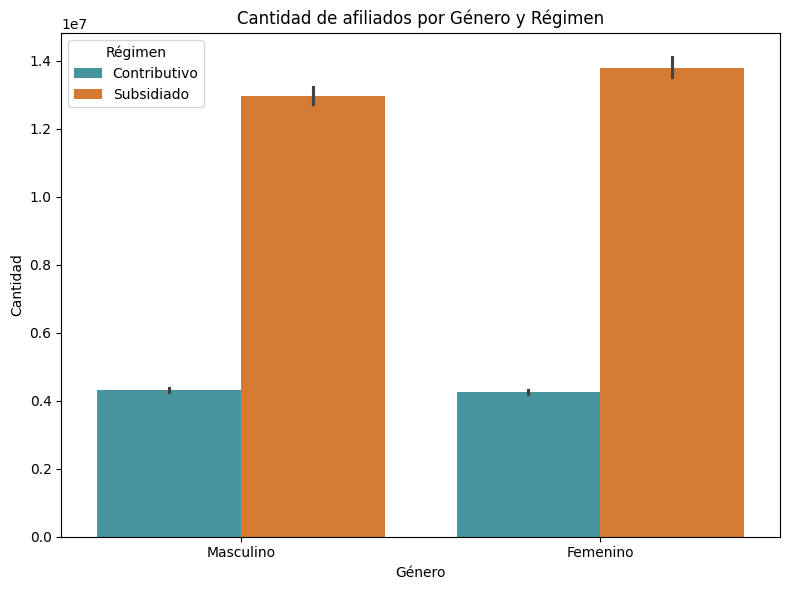

In [31]:
df_regimen['cantidad'] = pd.to_numeric(df_regimen['cantidad'], errors='coerce')

# Colores personalizados
colores_personalizados = {
    'Contributivo': '#36A0AD',
    'Subsidiado': '#F07718'
}

# Gráfico de barras agrupadas: Género vs Régimen
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_regimen,
    x='Genero',
    y='cantidad',
    hue='Régimen al que pertenece',
    estimator='sum',
    palette=colores_personalizados
)

plt.title('Cantidad de afiliados por Género y Régimen')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Régimen')
plt.tight_layout()
plt.show()

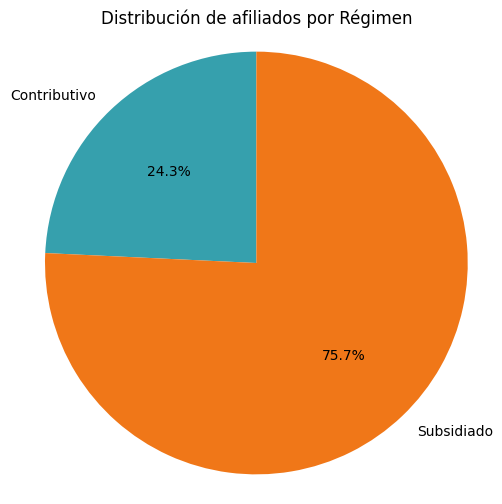

In [32]:
df_regimen['cantidad'] = pd.to_numeric(df_regimen['cantidad'], errors='coerce')

# Agrupar por régimen y sumar la cantidad
df_pie = df_regimen.groupby('Régimen al que pertenece')['cantidad'].sum()

# Colores personalizados
colores_personalizados = {
    'Contributivo': '#36A0AD',
    'Subsidiado': '#F07718'
}

# Crear gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(
    df_pie,
    labels=df_pie.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[colores_personalizados.get(r, '#cccccc') for r in df_pie.index]
)

plt.title('Distribución de afiliados por Régimen')
plt.axis('equal')  # Mantiene el gráfico como círculo
plt.show()

In [35]:
df_regimen['cantidad'] = pd.to_numeric(df_regimen['cantidad'], errors='coerce')
df_pie = df_regimen.groupby('Régimen al que pertenece')['cantidad'].sum()
df_tabla = df_pie.reset_index()
df_tabla.columns = ['Régimen', 'Total de afiliados']
total_general = df_tabla['Total de afiliados'].sum()
df_tabla['Porcentaje (%)'] = (df_tabla['Total de afiliados'] / total_general * 100).round(2)
fila_total = pd.DataFrame({
    'Régimen': ['TOTAL'],
    'Total de afiliados': [df_tabla['Total de afiliados'].sum()],
    'Porcentaje (%)': [df_tabla['Porcentaje (%)'].sum()]
})
df_tabla_con_total = pd.concat([df_tabla, fila_total], ignore_index=True)
print(df_tabla_con_total)

        Régimen  Total de afiliados  Porcentaje (%)
0  Contributivo           8569440.0           24.25
1    Subsidiado          26766990.0           75.75
2         TOTAL          35336430.0          100.00


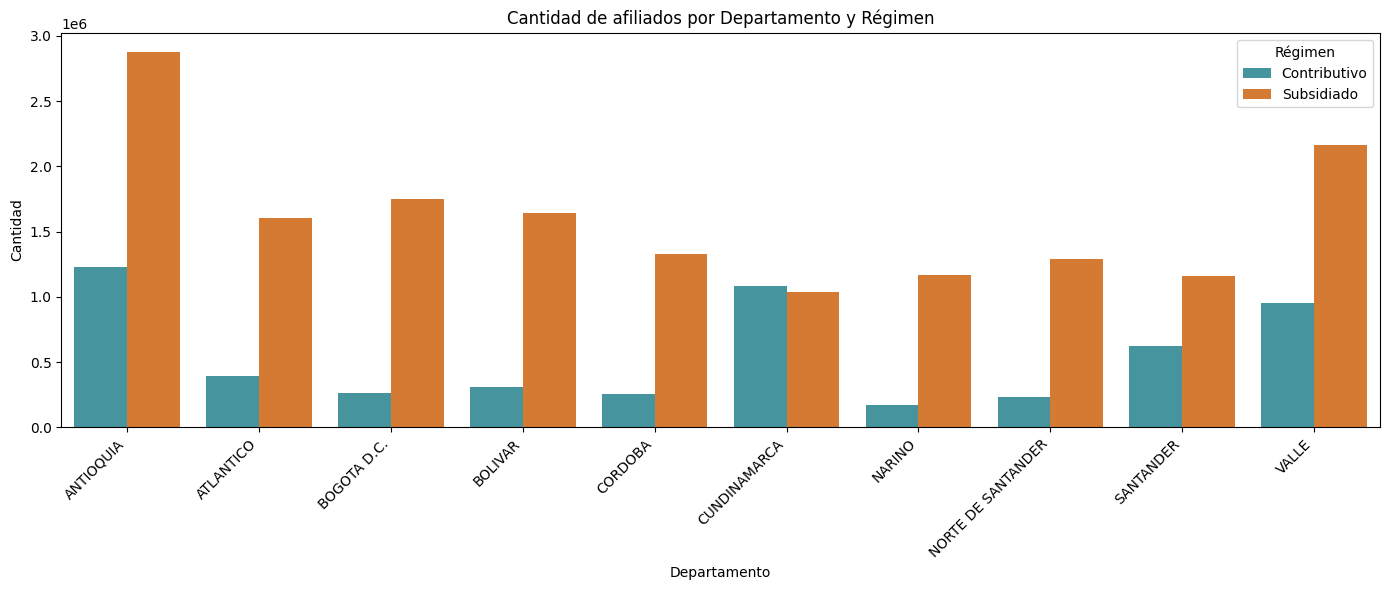

In [37]:
df_regimen['cantidad'] = pd.to_numeric(df_regimen['cantidad'], errors='coerce')

# Agrupar por Departamento y Régimen, sumar cantidad
df_depto_regimen = df_regimen.groupby(['Departamento', 'Régimen al que pertenece'])['cantidad'].sum().reset_index()

# Ordenar departamentos por total (opcional)
top_deptos = df_depto_regimen.groupby('Departamento')['cantidad'].sum().sort_values(ascending=False).head(10).index
df_filtrado = df_depto_regimen[df_depto_regimen['Departamento'].isin(top_deptos)]

# Gráfico
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_filtrado,
    x='Departamento',
    y='cantidad',
    hue='Régimen al que pertenece',
    palette={'Contributivo': '#36A0AD', 'Subsidiado': '#F07718'}
)

plt.title('Cantidad de afiliados por Departamento y Régimen')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Régimen')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1429809189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gp['cantidad'] = pd.to_numeric(df_gp['cantidad'], errors='coerce')
/tmp/ipython-input-1429809189.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped_filtrado['Grupo poblacional del afiliado'] = df_grouped_filtrado['Grupo poblacional del afiliado'].apply(dividir_etiqueta)


ValueError: left cannot be >= right

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython

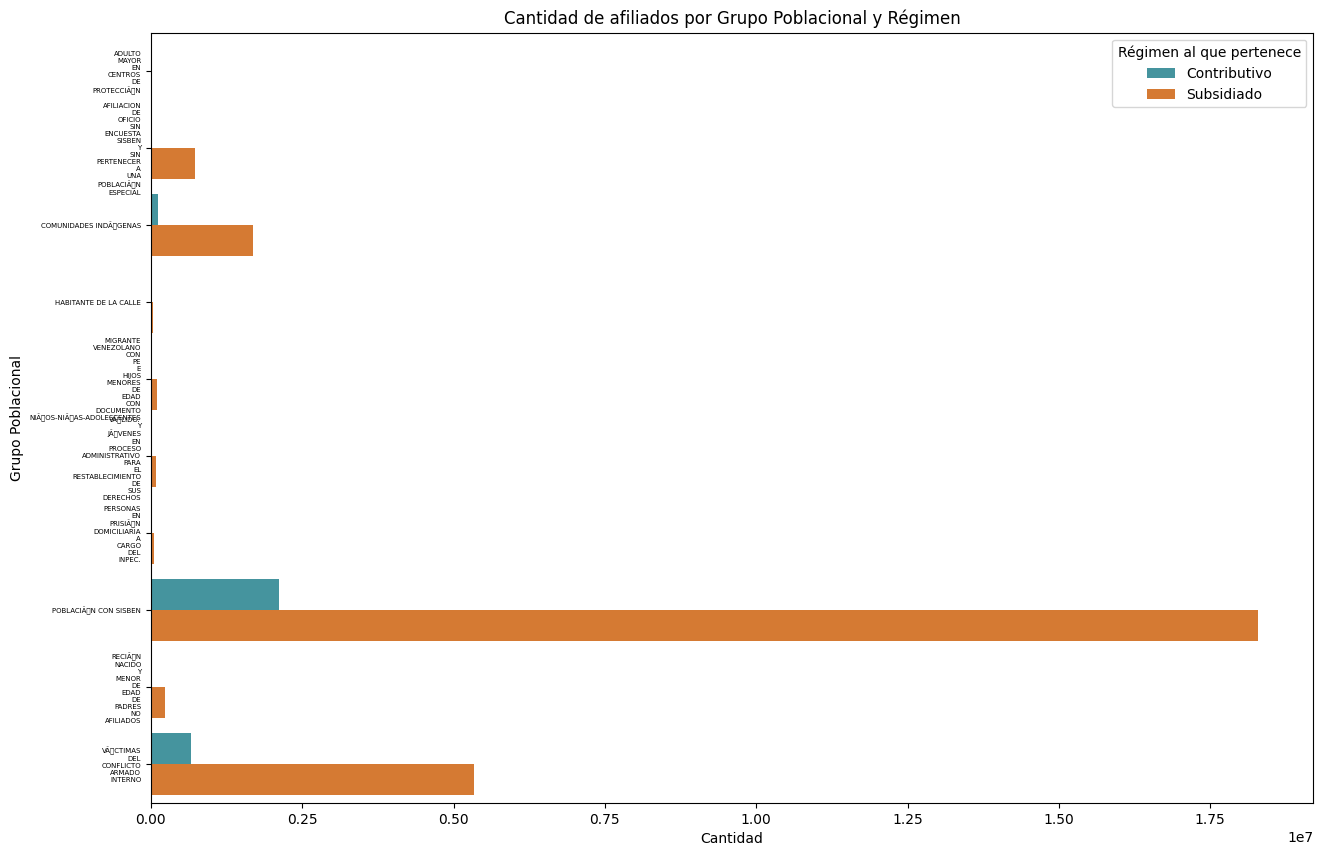

In [53]:
# 1. Limpiar datos: quitar NaN en columnas clave
df_gp = df_regimen.dropna(subset=['Grupo poblacional del afiliado', 'Régimen al que pertenece', 'cantidad'])

# 2. Asegurar que 'cantidad' sea numérica
df_gp['cantidad'] = pd.to_numeric(df_gp['cantidad'], errors='coerce')

# 3. Agrupar y sumar por Grupo Poblacional y Régimen
df_grouped = df_gp.groupby(['Grupo poblacional del afiliado', 'Régimen al que pertenece'])['cantidad'].sum().reset_index()

# 4. Filtrar Top 10 grupos poblacionales
top_grupos = df_grouped.groupby('Grupo poblacional del afiliado')['cantidad'].sum().sort_values(ascending=False).head(10).index
df_grouped_filtrado = df_grouped[df_grouped['Grupo poblacional del afiliado'].isin(top_grupos)]

def dividir_etiqueta(texto, largo_max=25):
    return '\n'.join(texto.split()) if len(texto) > largo_max else texto

df_grouped_filtrado['Grupo poblacional del afiliado'] = df_grouped_filtrado['Grupo poblacional del afiliado'].apply(dividir_etiqueta)

# 5. Colores personalizados
colores_personalizados = {
    'Contributivo': '#36A0AD',
    'Subsidiado': '#F07718'
}

# 6. Gráfico de barras horizontales agrupadas
plt.figure(figsize=(15, 10))
sns.barplot(
    data=df_grouped_filtrado,
    y='Grupo poblacional del afiliado',
    x='cantidad',
    hue='Régimen al que pertenece',
    palette=colores_personalizados
)

plt.title('Cantidad de afiliados por Grupo Poblacional y Régimen')
plt.xlabel('Cantidad')
plt.ylabel('Grupo Poblacional')
plt.yticks(fontsize=5)  # Tamaño de letra más pequeño si aún hay nombres largos
plt.subplots_adjust(left=2)
plt.legend(title='Régimen', loc='lower right')
plt.tight_layout()
plt.show()